In [1]:
import pandas as pd

data = pd.read_csv('Salary_Data2.csv')
data

,YearsExperience,EducationLevel,City,Salary
0,3.0,大學,城市A,45.9
1,7.8,碩士以上,城市C,80.5
2,2.3,高中以下,城市A,25.2
3,5.1,高中以下,城市A,30.4
4,10.0,碩士以上,城市B,65.7
5,1.2,碩士以上,城市C,60.8
6,8.6,大學,城市C,50.1
7,6.9,碩士以上,城市A,70.3
8,4.2,大學,城市A,40.7
9,2.4,高中以下,城市A,28.1


In [2]:
data['EducationLevel'] = data['EducationLevel'].map({"高中以下": 0, "大學": 1, "碩士以上": 2})

In [3]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()
onehot_encoder.fit(data[['City']])
city_encoder = onehot_encoder.transform(data[['City']]).toarray()

data[['CityA', 'CityB', 'CityC']] = city_encoder
data.drop(columns=['City', 'CityC'], inplace=True)
data

,YearsExperience,EducationLevel,Salary,CityA,CityB
0,3.0,1,45.9,1.0,0.0
1,7.8,2,80.5,0.0,0.0
2,2.3,0,25.2,1.0,0.0
3,5.1,0,30.4,1.0,0.0
4,10.0,2,65.7,0.0,1.0
5,1.2,2,60.8,0.0,0.0
6,8.6,1,50.1,0.0,0.0
7,6.9,2,70.3,1.0,0.0
8,4.2,1,40.7,1.0,0.0
9,2.4,0,28.1,1.0,0.0


In [4]:
from sklearn.model_selection import train_test_split
import torch

x = data.loc[:, ['YearsExperience', 'EducationLevel', 'CityA', 'CityB']]
y = data.loc[:, ['Salary']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=87)

x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# x_train = torch.from_numpy(x_train)
# x_test = torch.from_numpy(x_test)  
# y_train = torch.from_numpy(y_train)
# y_test = torch.from_numpy(y_test)

# 由於在進行特徵縮放時會轉為numpy格式，所以特徵縮放後再轉換為tensor格式就好了

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [6]:
x_train = torch.from_numpy(x_train)
x_test = torch.from_numpy(x_test)
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)

In [7]:
from torch import nn

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=4, out_features=1, dtype=torch.float64)# 記得先進行型態的轉換

    def forward(self, x):
        return self.linear_layer(x)

In [8]:
torch.manual_seed(87)
model = LinearRegressionModel()
model, model.state_dict()

(LinearRegressionModel(
   (linear_layer): Linear(in_features=4, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight',
               tensor([[-0.4710,  0.1380, -0.1459, -0.1397]], dtype=torch.float64)),
              ('linear_layer.bias', tensor([-0.4544], dtype=torch.float64))]))

In [9]:
x_train.dtype, model.linear_layer.weight.dtype, model.linear_layer.bias.dtype# 檢查型態是否一致

(torch.float64, torch.float64, torch.float64)

In [10]:
cost_function = nn.MSELoss()
y_pred = model(x_train)
cost = cost_function(y_pred, y_train)
print(cost)
print(model.state_dict())
print('\n')

optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)
optimizer.zero_grad()
cost.backward()
optimizer.step()

y_pred = model(x_train)
cost = cost_function(y_pred, y_train)
print(cost)
print(model.state_dict())

tensor(2913.9465, dtype=torch.float64, grad_fn=<MseLossBackward0>)
OrderedDict([('linear_layer.weight', tensor([[-0.4710,  0.1380, -0.1459, -0.1397]], dtype=torch.float64)), ('linear_layer.bias', tensor([-0.4544], dtype=torch.float64))])


tensor(1817.8312, dtype=torch.float64, grad_fn=<MseLossBackward0>)
OrderedDict([('linear_layer.weight', tensor([[ 1.3248,  3.1717, -2.4187,  1.0796]], dtype=torch.float64)), ('linear_layer.bias', tensor([9.8265], dtype=torch.float64))])


In [11]:
epochs = 10000# epochs: 代表完整的把資料看過一遍

train_cost_hist = []
test_cost_hist = []

for epoch in range(epochs + 1):
    model.train()

    train_pred = model(x_train)
    train_cost = cost_function(train_pred, y_train)

    train_cost_hist.append(train_cost.detach().numpy())# 因為train_cost_hist有追蹤梯度，所以要先detach()

    optimizer.zero_grad()
    train_cost.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_pred = model(x_test)
        test_cost = cost_function(test_pred, y_test)

        test_cost_hist.append(test_cost.numpy())

    if epoch%1000 == 0:
        print(f"Epoch: {epoch:5}, Train Cost: {train_cost: .4e}, Test Cost: {test_cost: .4e}")

Epoch:     0, Train Cost:  1.8178e+03, Test Cost:  1.5574e+03
Epoch:  1000, Train Cost:  2.5222e+01, Test Cost:  1.8116e+01
Epoch:  2000, Train Cost:  2.5222e+01, Test Cost:  1.8116e+01
Epoch:  3000, Train Cost:  2.5222e+01, Test Cost:  1.8116e+01
Epoch:  4000, Train Cost:  2.5222e+01, Test Cost:  1.8116e+01
Epoch:  5000, Train Cost:  2.5222e+01, Test Cost:  1.8116e+01
Epoch:  6000, Train Cost:  2.5222e+01, Test Cost:  1.8116e+01
Epoch:  7000, Train Cost:  2.5222e+01, Test Cost:  1.8116e+01
Epoch:  8000, Train Cost:  2.5222e+01, Test Cost:  1.8116e+01
Epoch:  9000, Train Cost:  2.5222e+01, Test Cost:  1.8116e+01
Epoch: 10000, Train Cost:  2.5222e+01, Test Cost:  1.8116e+01


In [12]:
model.state_dict()

OrderedDict([('linear_layer.weight',
              tensor([[ 4.1184, 14.1422, -1.4576, -3.7846]], dtype=torch.float64)),
             ('linear_layer.bias', tensor([50.9500], dtype=torch.float64))])

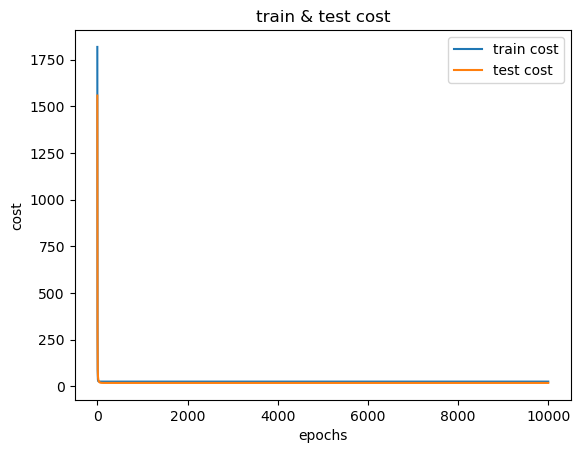

In [13]:
import matplotlib.pyplot as plt
plt.plot(range(0, epochs + 1), train_cost_hist, label='train cost')
plt.plot(range(0, epochs + 1), test_cost_hist, label='test cost')
plt.title("train & test cost")
plt.xlabel("epochs")
plt.ylabel("cost")
plt.legend()
plt.show()

In [14]:
print(model.linear_layer.weight, model.linear_layer.bias)

Parameter containing:
tensor([[ 4.1184, 14.1422, -1.4576, -3.7846]], dtype=torch.float64,
       requires_grad=True) Parameter containing:
tensor([50.9500], dtype=torch.float64, requires_grad=True)


In [15]:
model.eval()
with torch.inference_mode():
    y_pred = model(x_test)
y_pred, y_test

(tensor([[44.0351],
         [67.4403],
         [61.9550],
         [23.8027],
         [62.7482],
         [23.4854],
         [72.4253],
         [68.0749]], dtype=torch.float64),
 tensor([[43.8000],
         [72.7000],
         [60.8000],
         [24.9000],
         [56.3000],
         [25.2000],
         [80.5000],
         [70.3000]], dtype=torch.float64))

In [16]:
torch.save(obj=model.state_dict(), f='model/pytorch_multiple_linear_regression.pth')

In [17]:
torch.manual_seed(87)
model_2 = LinearRegressionModel()
model_2.state_dict()

OrderedDict([('linear_layer.weight',
              tensor([[-0.4710,  0.1380, -0.1459, -0.1397]], dtype=torch.float64)),
             ('linear_layer.bias', tensor([-0.4544], dtype=torch.float64))])

In [18]:
model_2.load_state_dict(state_dict=torch.load(f='model/pytorch_multiple_linear_regression.pth'))

<All keys matched successfully>

In [19]:
model_2.state_dict()

OrderedDict([('linear_layer.weight',
              tensor([[ 4.1184, 14.1422, -1.4576, -3.7846]], dtype=torch.float64)),
             ('linear_layer.bias', tensor([50.9500], dtype=torch.float64))])